## Set up

In [48]:
import os
base_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir) 

In [49]:
# import requests # request img from web
# import shutil # save img locally
# from pathlib import Path
from PIL import Image
# import numpy as np
# import math
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms

In [27]:
import imp
import extract_activations 
import utilities
imp.reload(utilities)
imp.reload(extract_activations) 

/tmp/ipykernel_13897/3903752803.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


The tqdm package is required to use captum.optim's n_steps stop criteria with progress bar


<module 'extract_activations' from '/mnt/c/Users/lauraa.omahony/Documents/~PhD_Stuff/1_Workspace/sw-interpretability/scripts/extract_activations.py'>

In [28]:
import sys
sys.path.append(f'{base_dir}/src/captum')
from captum import optim as optimviz

## Analyse activations and similarity

In [2]:
path = '/results/OpenAI_microscope_acts/'
layer = 'inception4e_branch1_conv'

In [3]:
activations_cat = np.load(f'../{path}{layer}/openai_cat.npy')[:17]
activations_car = np.load(f'../{path}{layer}/openai_car.npy') 
activations_fox = np.load(f'../{path}{layer}/openai_fox.npy')   
activations_dog = np.load(f'../{path}{layer}/openai_dog.npy') 

In [4]:
activations_cat_dict = {}
activations_car_dict = {}
activations_cat_avg_dict = {}
activations_car_avg_dict = {}

activations_cat_avg_dot_dict = {}
activations_car_avg_dot_dict = {}
activations_cat_car_avg_dot_dict = {}

activations_cat_avg_sim_dict = {}
activations_car_avg_sim_dict = {}
activations_cat_car_avg_sim_dict = {}

### Extract activations, calculate averages, dot products

In [5]:
activations_cat_avg = activations_cat.mean(3).mean(2) 
activations_car_avg = activations_car.mean(3).mean(2) 

In [ ]:
# np.dot(activations_car_avg[0], activations_car_avg[0])/(np.linalg.norm(activations_car_avg[0])*np.linalg.norm(activations_car_avg[0])) 

In [8]:
activations_cat_avg_dot = np.empty([len(activations_cat_avg),len(activations_cat_avg)])
activations_cat_avg_sim = np.empty([len(activations_cat_avg),len(activations_cat_avg)])
for i in range(len(activations_cat_avg)):
    for j in range(len(activations_cat_avg)):
        activations_cat_avg_dot[i,j] = np.dot(activations_cat_avg[i], activations_cat_avg[j])
        activations_cat_avg_sim[i,j] = activations_cat_avg_dot[i,j]/(np.linalg.norm(activations_cat_avg[i])*np.linalg.norm(activations_cat_avg[j])) 
        
activations_car_avg_dot = np.empty([len(activations_car_avg),len(activations_car_avg)])
activations_car_avg_sim = np.empty([len(activations_car_avg),len(activations_car_avg)])
for i in range(len(activations_car_avg)):
    for j in range(len(activations_car_avg)):
        activations_car_avg_dot[i,j] = np.dot(activations_car_avg[i], activations_car_avg[j])
        activations_car_avg_sim[i,j] = activations_car_avg_dot[i,j]/(np.linalg.norm(activations_car_avg[i])*np.linalg.norm(activations_car_avg[j])) 
        
activations_cat_car_avg_dot = np.empty([len(activations_cat_avg),len(activations_car_avg)])
activations_cat_car_avg_sim = np.empty([len(activations_cat_avg),len(activations_car_avg)])
for i in range(len(activations_cat_avg)):
    for j in range(len(activations_car_avg)):
        activations_cat_car_avg_dot[i,j] = np.dot(activations_cat_avg[i], activations_car_avg[j])
        activations_cat_car_avg_sim[i,j] = activations_cat_car_avg_dot[i,j]/(np.linalg.norm(activations_cat_avg[i])*np.linalg.norm(activations_car_avg[j])) 


### Save

In [9]:
activations_cat_dict[layer] = activations_cat
activations_car_dict[layer] = activations_car
activations_cat_avg_dict[layer] = activations_cat_avg
activations_car_avg_dict[layer] = activations_car_avg

activations_cat_avg_dot_dict[layer] = activations_cat_avg_dot
activations_car_avg_dot_dict[layer] = activations_car_avg_dot
activations_cat_car_avg_dot_dict[layer] = activations_cat_car_avg_dot

activations_cat_avg_sim_dict[layer] = activations_cat_avg_sim
activations_car_avg_sim_dict[layer] = activations_car_avg_sim
activations_cat_car_avg_sim_dict[layer] = activations_cat_car_avg_sim

### Analyse activations from some layer

In [21]:
# activations_cat_dict[layer].shape # (17, 256, 14, 14) # torch.Size([17, 256, 14, 14])
# activations_car_dict[layer].shape # (5, 256, 14, 14) # torch.Size([5, 256, 14, 14])

Outputs 256 14x14 feature maps. Taking GAP. 

In [20]:
# len(activations_cat_dict[layer]) # 17
# len(activations_car_dict[layer]) # 5
# activations_cat_avg_dict[layer].shape # (17, 256) # torch.Size([17, 256])
# activations_car_avg_dict[layer].shape # (5, 256) # torch.Size([5, 256]) 

In [ ]:
# car hood: imagenet 81, flickr 61, 76, 81, 98

### cat

In [41]:
print(activations_cat_avg_dict[layer][0][55])
print(activations_cat_dict[layer][0].mean(2).mean(1)[55])
print(activations_cat_dict[layer][1].mean(2).mean(1)[55])
print(activations_cat_dict[layer][2].mean(2).mean(1)[55])
print(activations_cat_dict[layer][-1].mean(2).mean(1)[55])

-0.68714136
-0.68714136
-0.82596076
-0.79818094
-1.0234644


In [34]:
activations_cat_avg_dict[layer][0]

array([-0.48029318, -0.440928  , -1.1318597 , -0.868313  , -1.1478603 ,
       -0.00760181, -0.6876765 , -0.29657462, -0.55996835, -0.8885499 ,
       -1.140543  , -0.6372748 , -0.89730847, -0.18612863, -1.0531948 ,
       -0.42816043, -0.64429   , -0.5317637 , -0.5016187 ,  0.03254019,
       -0.71058655, -0.45188072, -0.19258973, -1.238141  , -0.7214336 ,
       -0.5740507 , -1.0454957 , -0.7055136 , -0.80178887, -0.80327237,
       -0.4959897 , -0.7907266 , -0.54074734, -0.39557937, -1.1034777 ,
       -0.43680906, -0.44416243, -0.9196849 , -0.7040524 , -0.85386765,
        0.1558804 , -1.0633126 , -0.19317749, -0.78702587, -0.38370347,
       -0.51139635, -1.1708529 , -0.84971815, -0.11505312, -0.97327465,
        0.27174765, -1.4005291 ,  0.47356874, -0.8059207 , -0.89325386,
       -0.68714136, -0.2149651 , -0.2269193 , -0.69036734, -0.26356915,
       -0.68072075,  0.20460263, -0.775924  , -1.5525829 , -0.89035755,
       -0.82962644, -0.44511032, -0.69183695, -0.8258957 , -0.29

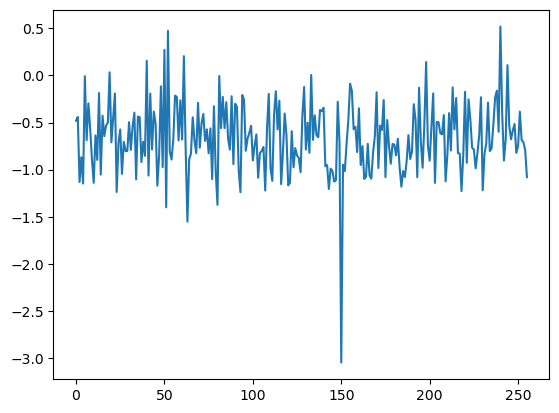

In [36]:
plt.plot(activations_cat_avg_dict[layer][0]) ### 42 peak

### car

In [42]:
print(activations_car_avg_dict[layer][0][55])
print(activations_car_dict[layer][0].mean(2).mean(1)[55])
print(activations_car_dict[layer][1].mean(2).mean(1)[55])
print(activations_car_dict[layer][2].mean(2).mean(1)[55])
print(activations_car_dict[layer][-1].mean(2).mean(1)[55])
# activation[layer][0].mean(2).mean(1)

-0.72310114
-0.72310114
-0.758774
-0.6329245
-0.67772096


In [38]:
activations_car_avg_dict[layer][0] 

array([-0.39174518, -0.43958983, -1.0984684 , -0.26815954, -0.76058567,
       -0.24826014, -0.39585355, -0.35177997, -0.03662631, -0.69557625,
       -0.6560526 , -0.35789913, -0.84729576, -0.7302632 , -0.6023158 ,
       -0.27176565, -0.587665  , -0.40641096, -0.5990447 , -0.3758602 ,
       -0.7368526 , -0.4898127 , -0.7580523 , -0.9003478 , -1.1239641 ,
       -0.41908365, -1.2194921 , -0.3641819 , -0.96308655, -0.614222  ,
       -0.5580266 , -0.9528226 , -0.35051888, -1.0506927 , -1.1122278 ,
       -0.23180778, -0.24082185, -0.51969254, -0.59213054, -1.1391073 ,
       -0.2954028 , -0.67835504, -1.1180288 , -0.70881385, -0.05450874,
       -0.27915296, -1.0930657 , -0.52534497, -0.16883942, -0.87234354,
        0.18287261, -1.120543  ,  0.25020698, -1.0091014 , -0.88562435,
       -0.72310114, -0.16507576, -0.13824573, -0.61259997, -0.3362328 ,
       -0.6489964 , -0.18367514, -0.38343742, -1.3655651 , -0.52154714,
       -0.9479262 , -0.34057078, -0.901409  , -0.46495706, -0.53

In [39]:
activations_car_avg_dict[layer][0][55]

-0.72310114

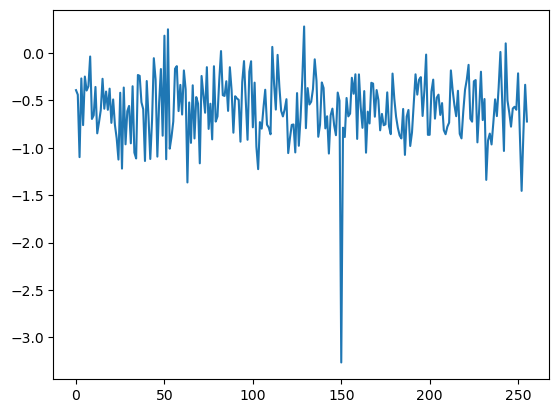

In [40]:
plt.plot(activations_car_avg_dict[layer][0]) # 42 peak

### Cosine similarities

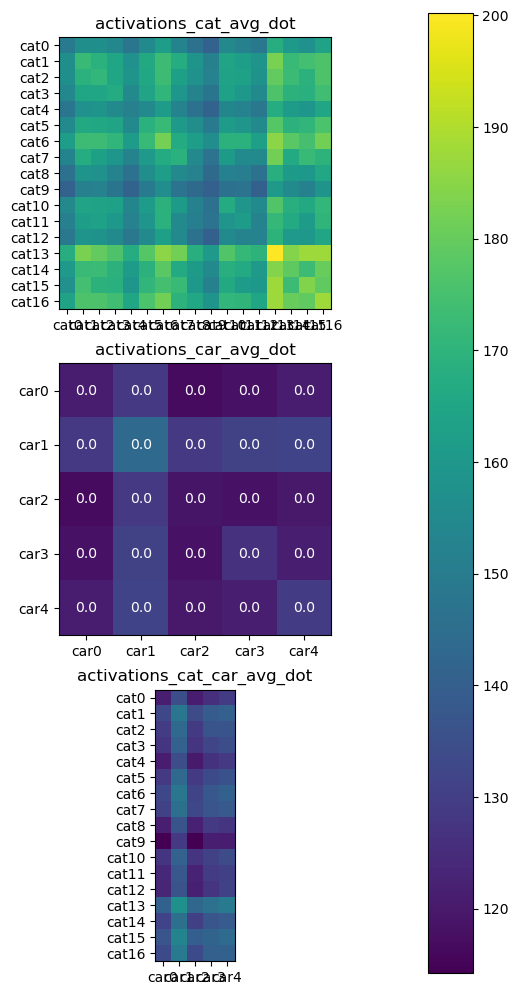

In [43]:
cat = [f"cat{i}" for i in range(len(activations_cat_avg_dot_dict[layer]))]
car = [f"car{i}" for i in range(len(activations_car_avg_dot_dict[layer]))]

min_dot = min(np.amin(activations_cat_avg_dot_dict[layer]), np.amin(activations_car_avg_dot_dict[layer]), np.amin(activations_cat_car_avg_dot_dict[layer])) 
max_dot = max(np.amax(activations_cat_avg_dot_dict[layer]), np.amax(activations_car_avg_dot_dict[layer]), np.amax(activations_cat_car_avg_dot_dict[layer])) 

fig, axs = plt.subplots(3,1,figsize=(6, 12))

im1 = axs[0].imshow(activations_cat_avg_dot_dict[layer], cmap='viridis', interpolation='nearest', vmin=min_dot, vmax=max_dot)
axs[0].set_xticks(np.arange(len(activations_cat_avg_dot_dict[layer])), labels=cat)
axs[0].set_yticks(np.arange(len(activations_cat_avg_dot_dict[layer])), labels=cat)
axs[0].set_title("activations_cat_avg_dot")

im2 = axs[1].imshow(activations_car_avg_dot_dict[layer], cmap='viridis', interpolation='nearest', vmin=min_dot, vmax=max_dot)
axs[1].set_xticks(np.arange(len(activations_car_avg_dot_dict[layer])), labels=car)
axs[1].set_yticks(np.arange(len(activations_car_avg_dot_dict[layer])), labels=car)
axs[1].set_title("activations_car_avg_dot")
for i in range(len(activations_car_avg_dot_dict[layer])):
    for j in range(len(activations_car_avg_dot_dict[layer])):
        text = axs[1].text(j, i, activations_car_avg_dot_dict[layer][i, j]//1000,
                       ha="center", va="center", color="w")
        
im2 = axs[2].imshow(activations_cat_car_avg_dot_dict[layer], cmap='viridis', interpolation='nearest', vmin=min_dot, vmax=max_dot)
axs[2].set_xticks(np.arange(len(activations_car_avg_dot_dict[layer])), labels=car)
axs[2].set_yticks(np.arange(len(activations_cat_avg_dot_dict[layer])), labels=cat)
axs[2].set_title("activations_cat_car_avg_dot")

plt.subplots_adjust(right=0.8)
cbar_ax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(mappable=(im1), cax=cbar_ax)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])

plt.show()

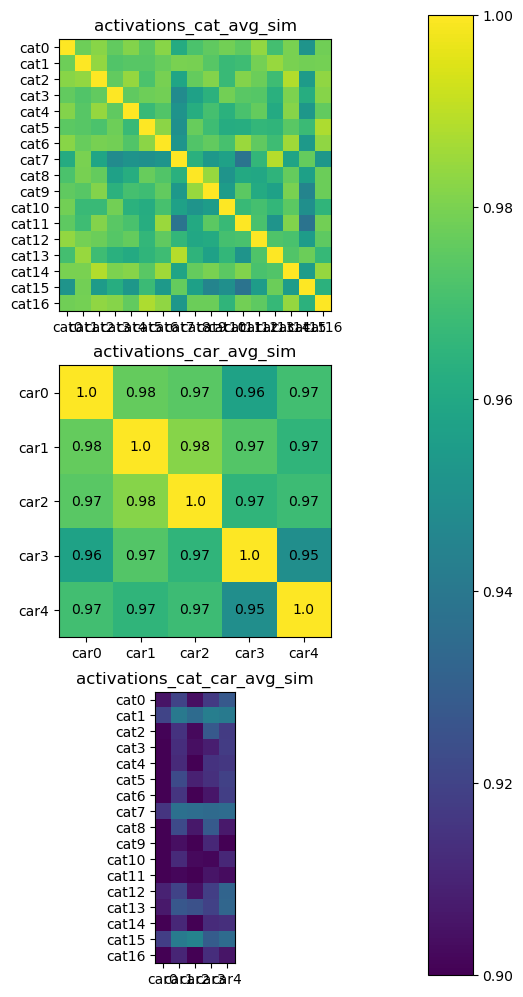

In [47]:
cat = [f"cat{i}" for i in range(len(activations_cat_avg_sim_dict[layer]))]
car = [f"car{i}" for i in range(len(activations_car_avg_sim_dict[layer]))]

min_sim = 0.9 
max_sim = 1

fig, axs = plt.subplots(3,1,figsize=(6, 12))

im1 = axs[0].imshow(activations_cat_avg_sim_dict[layer], cmap='viridis', interpolation='nearest', vmin=min_sim, vmax=max_sim) 
axs[0].set_xticks(np.arange(len(activations_cat_avg_sim_dict[layer])), labels=cat)
axs[0].set_yticks(np.arange(len(activations_cat_avg_sim_dict[layer])), labels=cat)
axs[0].set_title("activations_cat_avg_sim")

im2 = axs[1].imshow(activations_car_avg_sim_dict[layer], cmap='viridis', interpolation='nearest', vmin=min_sim, vmax=max_sim) 
axs[1].set_xticks(np.arange(len(activations_car_avg_sim_dict[layer])), labels=car)
axs[1].set_yticks(np.arange(len(activations_car_avg_sim_dict[layer])), labels=car)
axs[1].set_title("activations_car_avg_sim")
for i in range(len(activations_car_avg_sim_dict[layer])):
    for j in range(len(activations_car_avg_sim_dict[layer])):
        text = axs[1].text(j, i, round(activations_car_avg_sim_dict[layer][i, j],2),
                       ha="center", va="center") # , color="w"
        
im2 = axs[2].imshow(activations_cat_car_avg_sim_dict[layer], cmap='viridis', interpolation='nearest', vmin=min_sim, vmax=max_sim) 
axs[2].set_xticks(np.arange(len(activations_car_avg_sim_dict[layer])), labels=car)
axs[2].set_yticks(np.arange(len(activations_cat_avg_sim_dict[layer])), labels=cat)
axs[2].set_title("activations_cat_car_avg_sim")

plt.subplots_adjust(right=0.8)
cbar_ax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(mappable=(im1), cax=cbar_ax)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])

plt.show()

## Other

Another model...

In [ ]:
activations_cat = torch.empty(0,256,14,14)
activations_car = torch.empty(0,256,14,14)
directory_cat = f'{base_dir}/data/test-images/cat'
directory_car = f'{base_dir}/data/test-images/car'

for file in os.listdir(directory_cat): # os.listdir(directory)
    activation = {}
    input_image = Image.open(directory_cat+'/'+file).convert('RGB') # since 'RGBA'
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0)

    googlenet_torchvision.inception4e.branch1.conv.register_forward_hook(get_activation(layer, googlenet_torchvision))
    output = googlenet_torchvision(input_batch)
    activations_cat = torch.cat((activations_cat,activation[layer]))

for file in os.listdir(directory_car):
    activation = {}
    input_image = Image.open(directory_car+'/'+file).convert('RGB') # since 'RGBA'
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0)

    googlenet_torchvision.inception4e.branch1.conv.register_forward_hook(get_activation(layer, googlenet_torchvision))
    output = googlenet_torchvision(input_batch)
    activations_car = torch.cat((activations_car,activation[layer]))